In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# **precipitation - temp_max**

Text(0, 0.5, 'temp_max')

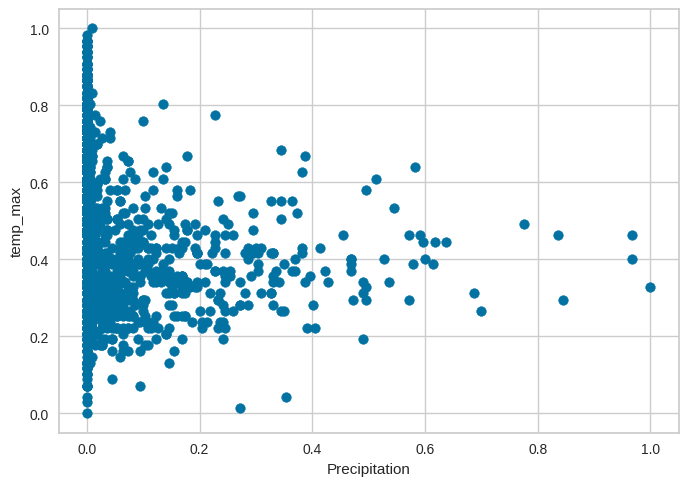

In [ ]:
plt.scatter(df.precipitation,df['temp_max']) # menampilkan hubungan antara variabel precipitation dan temp_max
plt.xlabel('Precipitation')
plt.ylabel('temp_max')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['precipitation','temp_max']])
y_predicted # cluster yang dihasilkan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()
km.cluster_centers_ # koordinat centroid

array([[0.38245138, 0.38466875],
       [0.00656433, 0.68449159],
       [0.03757191, 0.34118018]])

In [ ]:
scaler = MinMaxScaler() # digunakan untuk melakukan normalisasi dengan penskalaan fitur antara 0 sampai 1 untuk meningkatkan kinerja algoritma machine learning yang sensitif terhadap skala, X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler.fit(df[['temp_max']])
df['temp_max'] = scaler.transform(df[['temp_max']])

scaler.fit(df[['precipitation']])
df['precipitation'] = scaler.transform(df[['precipitation']])
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,2
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,2
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,2
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,0
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,2
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,2
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,2
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,2


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['precipitation','temp_max']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,2
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,2
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,2
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,0
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,2
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,2
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,2
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,2


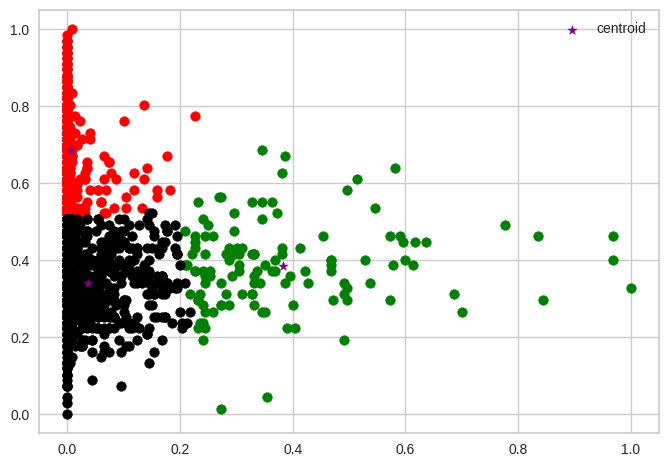

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.precipitation,df1['temp_max'],color='green')
plt.scatter(df2.precipitation,df2['temp_max'],color='red')
plt.scatter(df3.precipitation,df3['temp_max'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

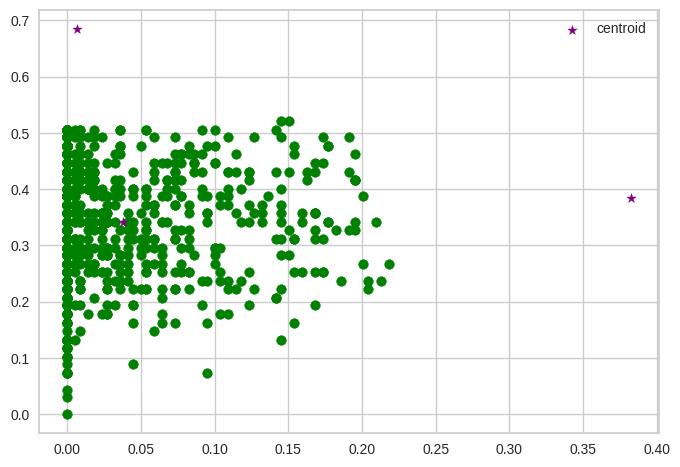

In [ ]:
#Clusterlah dataset seattle-weather dengan nilai K 2, 3, 4

df1 = df[df.cluster==2]
df2 = df[df.cluster==3]
df3 = df[df.cluster==4]
plt.scatter(df1.precipitation,df1['temp_max'],color='green')
plt.scatter(df2.precipitation,df2['temp_max'],color='red')
plt.scatter(df3.precipitation,df3['temp_max'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

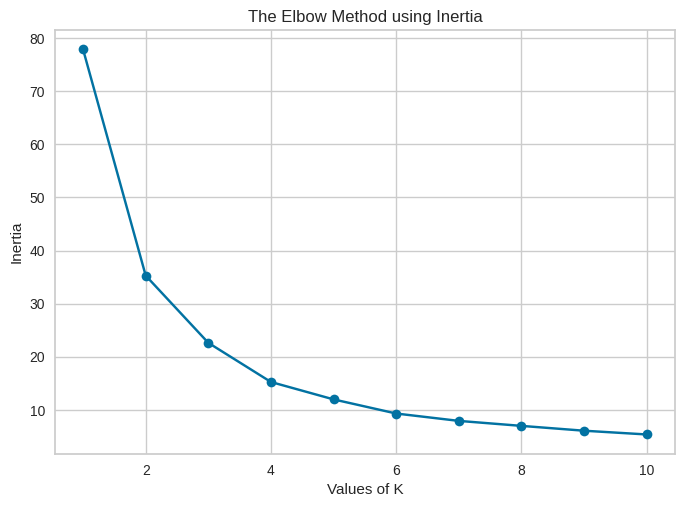

In [ ]:
inertia = [] # rata-rata dari jumlah jarak kuadrat antara setiap sampel dan pusat klaster terdekat, mirip dengan disortion
X = df[['precipitation','temp_max']]
K = range(1, 11)

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

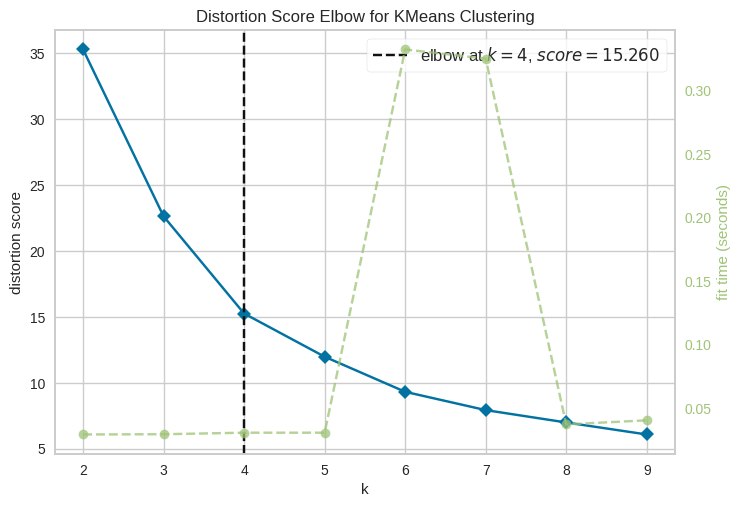

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

X = df[['precipitation','temp_max']]
clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(clustering, k=(2,10))

visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2, 11)  # minimum 2 klaster
X = df[['precipitation', 'temp_max']]

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    labels = clustering.labels_
    silhouette.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for k, score in zip(K, silhouette): # zip : menggabungkan beberapa iterable menjadi satu iterable tunggal yang menghasilkan tupel
    print(f"For n_clusters = {k}, the silhouette score is {score}")

For n_clusters = 2, the silhouette score is 0.5142736757419388
For n_clusters = 3, the silhouette score is 0.538955076577309
For n_clusters = 4, the silhouette score is 0.4727684192360872
For n_clusters = 5, the silhouette score is 0.44264896266273923
For n_clusters = 6, the silhouette score is 0.4573742757441277
For n_clusters = 7, the silhouette score is 0.43559844686533317
For n_clusters = 8, the silhouette score is 0.43208680761670015
For n_clusters = 9, the silhouette score is 0.42394939604664156
For n_clusters = 10, the silhouette score is 0.43461829610326524


# **temp_min - wind**

Text(0, 0.5, 'wind')

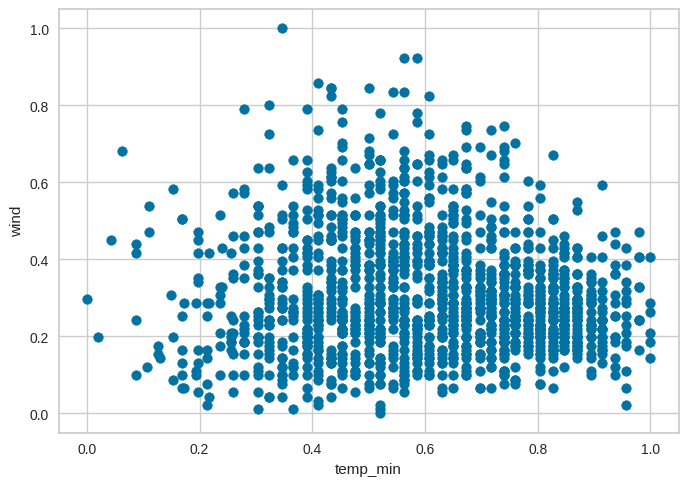

In [ ]:
plt.scatter(df.temp_min ,df['wind']) # menampilkan hubungan antara variabel temp_min dan wind
plt.xlabel('temp_min')
plt.ylabel('wind')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['temp_min','wind']])
y_predicted # cluster yang dihasilkan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()
km.cluster_centers_ # koordinat centroid

array([[0.4128407 , 0.21562613],
       [0.77762178, 0.26441995],
       [0.52379223, 0.52962599]])

In [ ]:
scaler = MinMaxScaler() # digunakan untuk melakukan normalisasi dengan penskalaan fitur antara 0 sampai 1 untuk meningkatkan kinerja algoritma machine learning yang sensitif terhadap skala, X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler.fit(df[['temp_min']])
df['temp_min'] = scaler.transform(df[['temp_min']])

scaler.fit(df[['wind']])
df['wind'] = scaler.transform(df[['wind']])
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,2
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,2
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,0
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,2
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,0
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,0
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,0
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,0


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['temp_min','wind']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,2
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,2
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,1
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,2
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,1
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,1
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,1
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,1


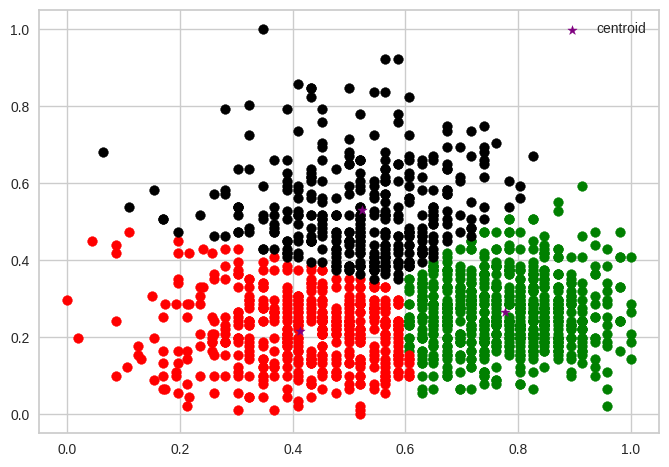

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.temp_min ,df1['wind'],color='green')
plt.scatter(df2.temp_min ,df2['wind'],color='red')
plt.scatter(df3.temp_min ,df3['wind'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

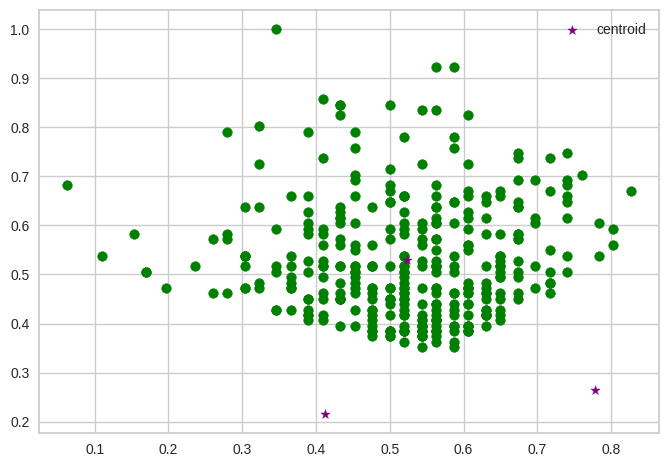

In [ ]:
#Clusterlah dataset seattle-weather dengan nilai K 2, 3, 4

df1 = df[df.cluster==2]
df2 = df[df.cluster==3]
df3 = df[df.cluster==4]
plt.scatter(df1.temp_min ,df1['wind'],color='green')
plt.scatter(df2.temp_min ,df2['wind'],color='red')
plt.scatter(df3.temp_min ,df3['wind'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

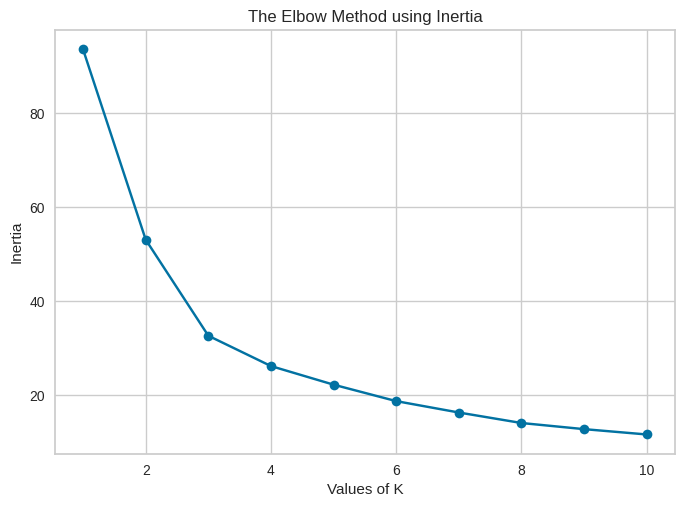

In [ ]:
inertia = [] # rata-rata dari jumlah jarak kuadrat antara setiap sampel dan pusat klaster terdekat, mirip dengan disortion
X = df[['temp_min','wind']]
K = range(1, 11)

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

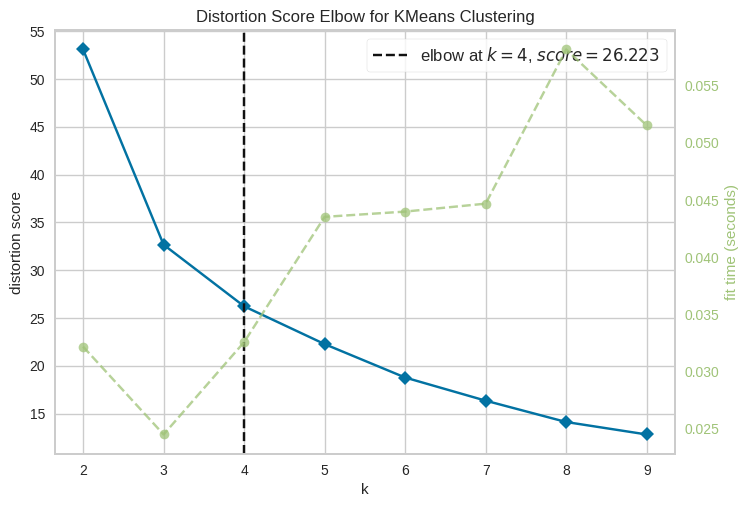

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

X = df[['temp_min','wind']]
clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(clustering, k=(2,10))

visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2, 11)  # minimum 2 klaster
X = df[['temp_min', 'wind']]

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    labels = clustering.labels_
    silhouette.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for k, score in zip(K, silhouette): # zip : menggabungkan beberapa iterable menjadi satu iterable tunggal yang menghasilkan tupel
    print(f"For n_clusters = {k}, the silhouette score is {score}")

For n_clusters = 2, the silhouette score is 0.39912166103877633
For n_clusters = 3, the silhouette score is 0.44323068866380794
For n_clusters = 4, the silhouette score is 0.36491645786540544
For n_clusters = 5, the silhouette score is 0.35617039536799816
For n_clusters = 6, the silhouette score is 0.3504522887978171
For n_clusters = 7, the silhouette score is 0.34584797379214405
For n_clusters = 8, the silhouette score is 0.3457155553710916
For n_clusters = 9, the silhouette score is 0.3430942358989259
For n_clusters = 10, the silhouette score is 0.3409083720692803


# **precipitation ~ temp_min**

Text(0, 0.5, 'temp_min')

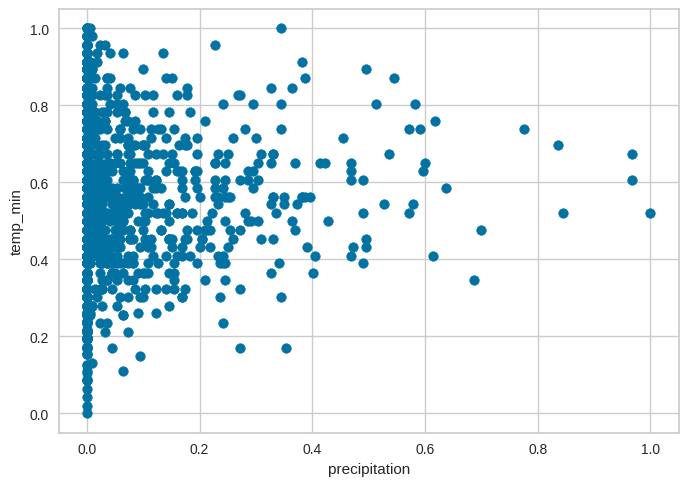

In [ ]:
plt.scatter(df.precipitation ,df['temp_min']) # menampilkan hubungan antara variabel precipitation dan temp_min
plt.xlabel('precipitation')
plt.ylabel('temp_min')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['precipitation','temp_min']])
y_predicted # cluster yang dihasilkan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()
km.cluster_centers_ # koordinat centroid

array([[0.01797941, 0.76585018],
       [0.03575855, 0.42415398],
       [0.39585298, 0.5944524 ]])

In [ ]:
scaler = MinMaxScaler() # digunakan untuk melakukan normalisasi dengan penskalaan fitur antara 0 sampai 1 untuk meningkatkan kinerja algoritma machine learning yang sensitif terhadap skala, X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler.fit(df[['precipitation']])
df['precipitation'] = scaler.transform(df[['precipitation']])

scaler.fit(df[['temp_min']])
df['temp_min'] = scaler.transform(df[['temp_min']])
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,1
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,2
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,1
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,1
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,1
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,1


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['precipitation','temp_min']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,1
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,2
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,1
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,1
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,1
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,1


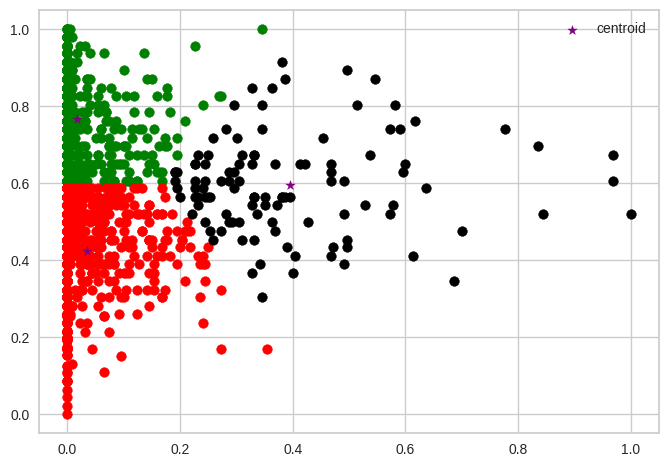

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.precipitation ,df1['temp_min'],color='green')
plt.scatter(df2.precipitation ,df2['temp_min'],color='red')
plt.scatter(df3.precipitation ,df3['temp_min'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

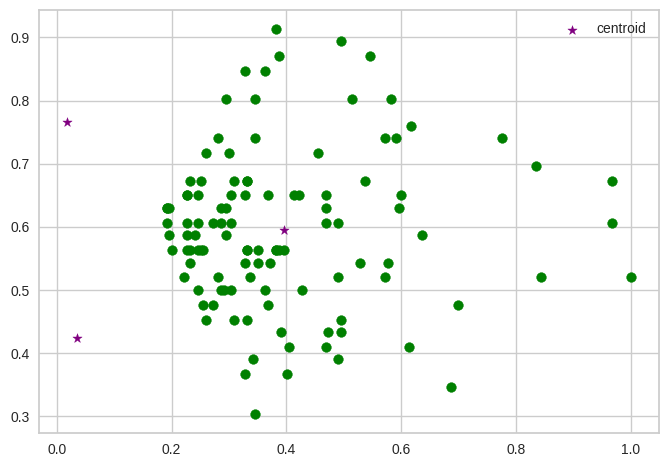

In [ ]:
#Clusterlah dataset seattle-weather dengan nilai K 2, 3, 4

df1 = df[df.cluster==2]
df2 = df[df.cluster==3]
df3 = df[df.cluster==4]
plt.scatter(df1.precipitation ,df1['temp_min'],color='green')
plt.scatter(df2.precipitation ,df2['temp_min'],color='red')
plt.scatter(df3.precipitation ,df3['temp_min'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

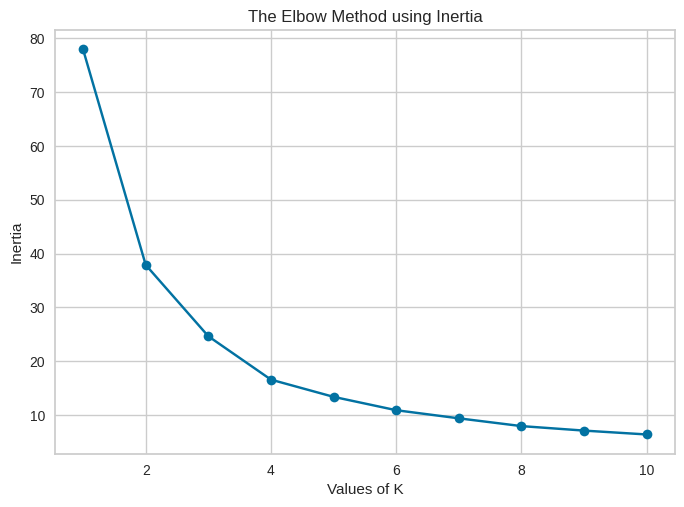

In [ ]:
inertia = [] # rata-rata dari jumlah jarak kuadrat antara setiap sampel dan pusat klaster terdekat, mirip dengan disortion
X = df[['precipitation','temp_min']]
K = range(1, 11)

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

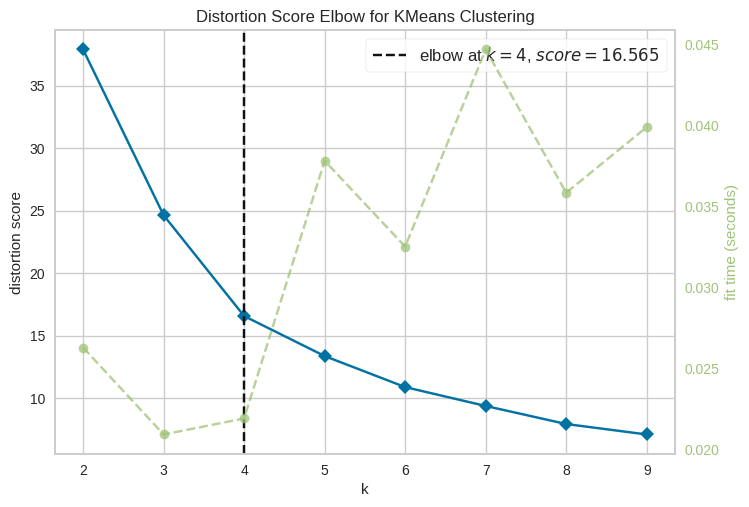

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

X = df[['precipitation','temp_min']]
clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(clustering, k=(2,10))

visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2, 11)  # minimum 2 klaster
X = df[['precipitation', 'temp_min']]

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    labels = clustering.labels_
    silhouette.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for k, score in zip(K, silhouette): # zip : menggabungkan beberapa iterable menjadi satu iterable tunggal yang menghasilkan tupel
    print(f"For n_clusters = {k}, the silhouette score is {score}")

For n_clusters = 2, the silhouette score is 0.4923200615644134
For n_clusters = 3, the silhouette score is 0.535237353730682
For n_clusters = 4, the silhouette score is 0.472949049882188
For n_clusters = 5, the silhouette score is 0.43812880547746474
For n_clusters = 6, the silhouette score is 0.4511782242599093
For n_clusters = 7, the silhouette score is 0.420704811624778
For n_clusters = 8, the silhouette score is 0.44110144810077057
For n_clusters = 9, the silhouette score is 0.42416475348670696
For n_clusters = 10, the silhouette score is 0.42708390204729063


# **temp_max ~ wind**

Text(0, 0.5, 'wind')

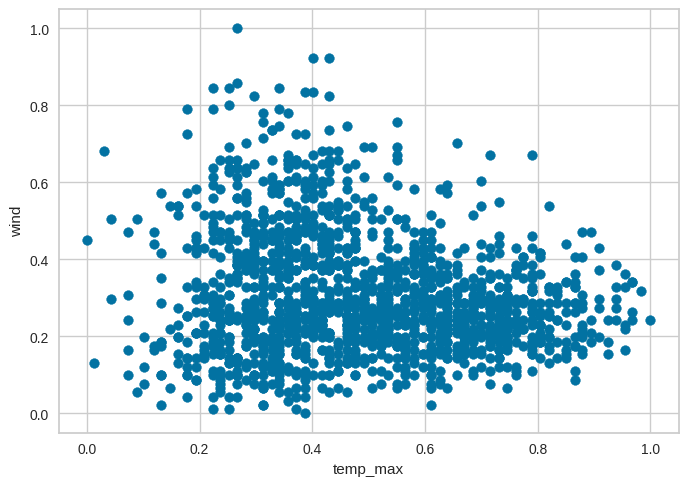

In [ ]:
plt.scatter(df.temp_max ,df['wind']) # menampilkan hubungan antara variabel temp_max dan wind
plt.xlabel('temp_max')
plt.ylabel('wind')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['temp_max','wind']])
y_predicted # cluster yang dihasilkan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()
km.cluster_centers_ # koordinat centroid

array([[0.33930282, 0.21097122],
       [0.36283939, 0.519325  ],
       [0.68595019, 0.26377364]])

In [ ]:
scaler = MinMaxScaler() # digunakan untuk melakukan normalisasi dengan penskalaan fitur antara 0 sampai 1 untuk meningkatkan kinerja algoritma machine learning yang sensitif terhadap skala, X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler.fit(df[['temp_max']])
df['temp_max'] = scaler.transform(df[['temp_max']])

scaler.fit(df[['wind']])
df['wind'] = scaler.transform(df[['wind']])
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,0
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,1
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,0
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,0
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,0
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,0


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['temp_max','wind']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,date,precipitation,temp_max,temp_min,wind,weather,cluster
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,drizzle,1
1,2012-01-02,0.194991,0.327957,0.389764,0.450549,rain,1
2,2012-01-03,0.014311,0.357527,0.562992,0.208791,rain,2
3,2012-01-04,0.363148,0.370968,0.500000,0.472527,rain,1
4,2012-01-05,0.023256,0.282258,0.389764,0.626374,rain,1
...,...,...,...,...,...,...,...
1456,2015-12-27,0.153846,0.161290,0.346457,0.274725,rain,2
1457,2015-12-28,0.026834,0.177419,0.346457,0.098901,rain,2
1458,2015-12-29,0.000000,0.236559,0.303150,0.241758,fog,2
1459,2015-12-30,0.000000,0.193548,0.240157,0.329670,sun,2


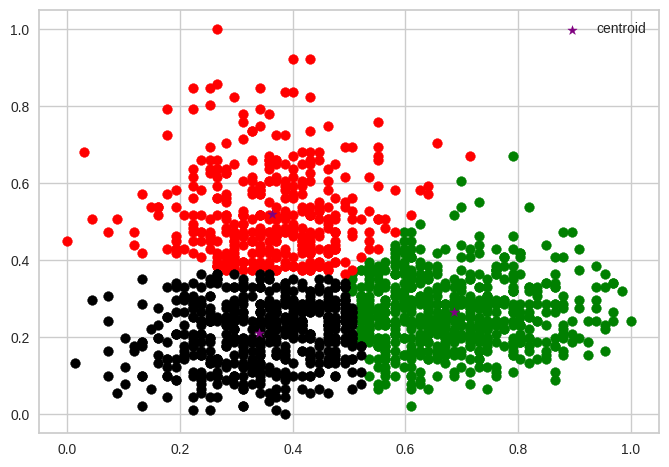

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.temp_max ,df1['wind'],color='green')
plt.scatter(df2.temp_max ,df2['wind'],color='red')
plt.scatter(df3.temp_max ,df3['wind'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

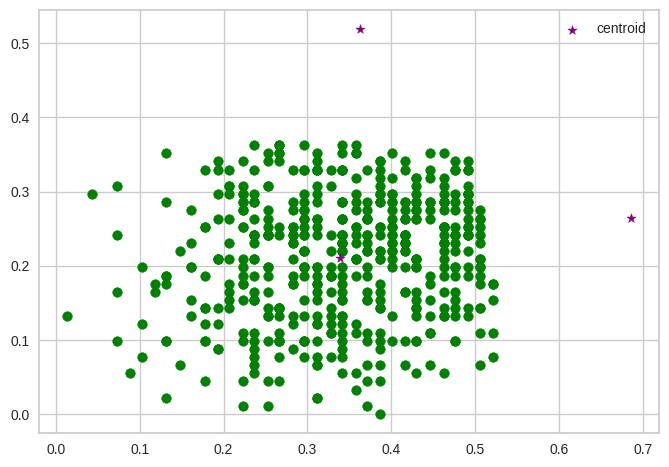

In [ ]:
#Clusterlah dataset seattle-weather dengan nilai K 2, 3, 4

df1 = df[df.cluster==2]
df2 = df[df.cluster==3]
df3 = df[df.cluster==4]
plt.scatter(df1.temp_max ,df1['wind'],color='green')
plt.scatter(df2.temp_max ,df2['wind'],color='red')
plt.scatter(df3.temp_max ,df3['wind'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

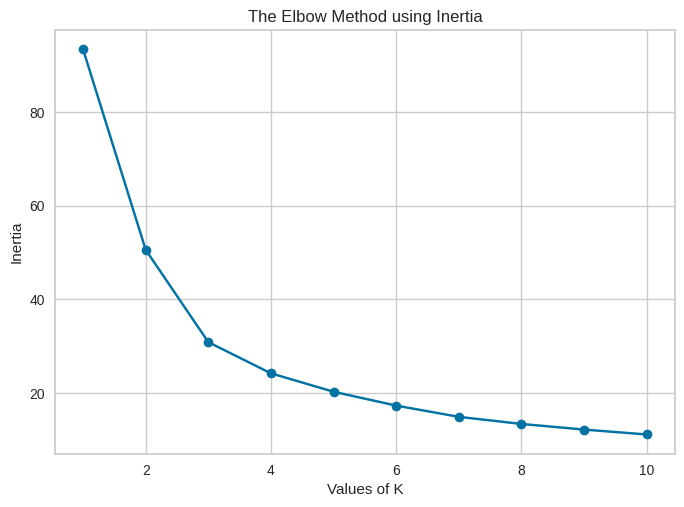

In [ ]:
inertia = [] # rata-rata dari jumlah jarak kuadrat antara setiap sampel dan pusat klaster terdekat, mirip dengan disortion
X = df[['temp_max','wind']]
K = range(1, 11)

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    inertia.append(clustering.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

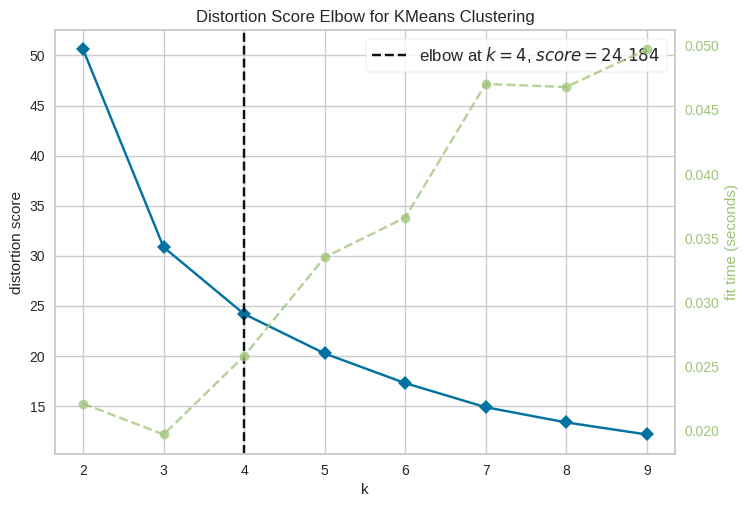

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

X = df[['temp_max','wind']]
clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(clustering, k=(2,10))

visualizer.fit(X)
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2, 11)  # minimum 2 klaster
X = df[['temp_max', 'wind']]

for k in K:
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    labels = clustering.labels_
    silhouette.append(silhouette_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for k, score in zip(K, silhouette): # zip : menggabungkan beberapa iterable menjadi satu iterable tunggal yang menghasilkan tupel
    print(f"For n_clusters = {k}, the silhouette score is {score}")

For n_clusters = 2, the silhouette score is 0.41237100244708724
For n_clusters = 3, the silhouette score is 0.43660497790923525
For n_clusters = 4, the silhouette score is 0.37503638466080735
For n_clusters = 5, the silhouette score is 0.358363633959918
For n_clusters = 6, the silhouette score is 0.36185195290199385
For n_clusters = 7, the silhouette score is 0.3413057463516093
For n_clusters = 8, the silhouette score is 0.3379177569377738
For n_clusters = 9, the silhouette score is 0.33552291808084483
For n_clusters = 10, the silhouette score is 0.3259561879094978
